### Aggregate data into conditions/groups

The purpose of this notebook is to read in the parsed files (for each subject, each video/condition) and combine them so that we have a file in which all subjects that viewed a particular video (and/or in a particular condition) can be loaded more easily.

#### load relevant modules

In [1]:
import os, glob, warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import zscore

import numpy as np
from scipy import interpolate


#### set up list of files and subjects

In [2]:
folders = glob.glob("../data/00_raw_data/sub*")
folders.sort()
subjs = []
for f in folders:
    subjs.append(f[-6:])

n_subjs = len(subjs)
print(n_subjs)

subjs[:3]

59


['sub001', 'sub002', 'sub003']

In [3]:
file_list = [   'commercial_milk_30s',
                'commercial_starbucks_30s',
                'commercial_dominos_30s',
                'health_diet_30s',
                'health_weight_30s',
                'health_covid_vaccine_30s',
                'commercial_progressive_30s',
                'commercial_publix_30s',
                'commercial_carscom_30s',
                'health_fitness_30s',
                'health_prediabetes_30s',
                'health_drunk_driving_30s',
                'commercial_lego_30s',
                'health_mantherapy_30s',
                'health_alcohol_30s',
                'commercial_meta_quest_2_30s',
                'health_vaping_30s',
                'commercial_google_pixel_30s',
                'commercial_jersey_mikes_30s',
                'health_stroke_30s',
                'commercial_cookies_30s',
                'commercial_puma_30s',
                'commercial_aribnb_30s',
                'commercial_att_30s',
                'health_kidney_30s',
                'commercial_hr_block_30s',
                'commercial_under_armour_30s',
                'commercial_expedia_30s',
                'commercial_doritos_30s',
                'health_alzheimers_30s']

print(len(file_list))

endings = ['_50nd',
           '_50wd',
           '_100']

30


#### read data into one big 'mega-structure' 


In [4]:
mega_structure = {}


for curr_file in file_list:
    #print(curr_file)
    for curr_ending in endings:
        #if curr_ending == '_100':
            #print(curr_ending)
            current_name = curr_file + curr_ending
            
            mega_structure[current_name] = {}
            
            for curr_sub in range(n_subjs): 

                #print(subjs[curr_sub])

                

                file_path = '../data/01_parsed_video_data/' + subjs[curr_sub] + '/' + curr_file + curr_ending + '.csv'
                if os.path.isfile(file_path):
                        #print(file_path)
                        df = pd.read_csv(file_path)
                        
                        
                        mega_structure[current_name][subjs[curr_sub]] = df['pupil diameter'].interpolate().values
                        #a=1

#### Aggregate over spots and save out NPY-files

In [5]:
for curr_file in file_list:
    #print(curr_file)
    for curr_ending in endings:
        #if curr_ending == '_100':
            #print(curr_ending)
            current_name = curr_file + curr_ending
            
            curr_subjs = []
            for sub_name in mega_structure[current_name].keys():
                    curr_subjs.append(sub_name)
            curr_subjs
            #print(len(curr_subjs))
            
            
            c = 0
            x_length = 725 #mega_structure[current_name][curr_subjs[c]].shape[0] - 30
            print(x_length)
            s_length = len(curr_subjs)

            this_subj_data = np.zeros((s_length, x_length))

            for c in range(len(curr_subjs)):
                #print(curr_subjs[c])
                
                if (mega_structure[current_name][curr_subjs[c]][:x_length].shape[0]) > x_length-1 :
                    this_subj_data[c, :]  = mega_structure[current_name][curr_subjs[c]][:x_length]
                else:
                    this_subj_data[c, :]  = np.nan
                    print('hey')

            print(current_name)
            print(len(curr_subjs))
            print(this_subj_data.shape)
            file_out_name = '../data/02_aggregate_video_data/' + current_name + '.npy'
            np.save(file_out_name, this_subj_data)
            
            

725
commercial_milk_30s_50nd
20
(20, 725)
725
hey
commercial_milk_30s_50wd
19
(19, 725)
725
commercial_milk_30s_100
20
(20, 725)
725
hey
commercial_starbucks_30s_50nd
20
(20, 725)
725
commercial_starbucks_30s_50wd
20
(20, 725)
725
commercial_starbucks_30s_100
19
(19, 725)
725
hey
commercial_dominos_30s_50nd
19
(19, 725)
725
commercial_dominos_30s_50wd
20
(20, 725)
725
commercial_dominos_30s_100
20
(20, 725)
725
health_diet_30s_50nd
19
(19, 725)
725
health_diet_30s_50wd
20
(20, 725)
725
health_diet_30s_100
20
(20, 725)
725
hey
health_weight_30s_50nd
20
(20, 725)
725
health_weight_30s_50wd
20
(20, 725)
725
health_weight_30s_100
19
(19, 725)
725
health_covid_vaccine_30s_50nd
19
(19, 725)
725
health_covid_vaccine_30s_50wd
20
(20, 725)
725
health_covid_vaccine_30s_100
20
(20, 725)
725
commercial_progressive_30s_50nd
20
(20, 725)
725
commercial_progressive_30s_50wd
20
(20, 725)
725
commercial_progressive_30s_100
19
(19, 725)
725
commercial_publix_30s_50nd
20
(20, 725)
725
commercial_publix_3

#### Explore ...

Now that we have the data parsed, we can read in a given video's pupil data conveniently, and average and plot it ...

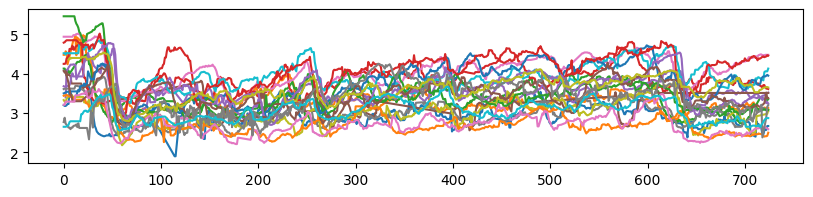

In [6]:
alzheimer_data = np.load('../data/02_aggregate_video_data/health_alzheimers_30s_100.npy')
alzheimer_data.shape
plt.figure(figsize = (10,2));

plt.plot(alzheimer_data.T);

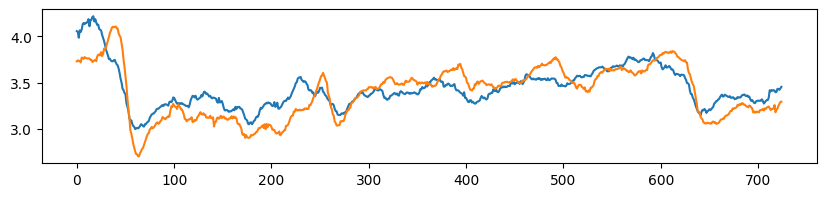

In [7]:
aaa = np.load('../data/02_aggregate_video_data/health_alzheimers_30s_100.npy')

m1 = np.nanmean(aaa[:10, :], axis = 0)
m2 = np.nanmean(aaa[10:, :], axis = 0)

plt.figure(figsize = (10,2));
plt.plot(m1);
plt.plot(m2);

#### do the same for another spot

(20, 725)


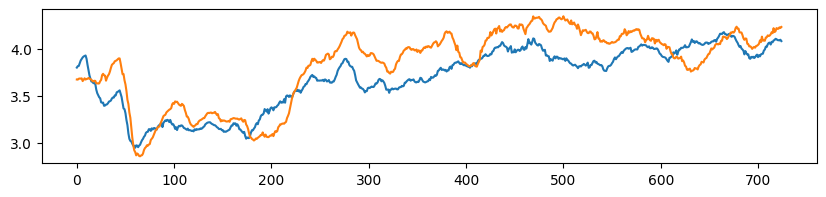

In [8]:
aaa = np.load('../data/02_aggregate_video_data/commercial_expedia_30s_50wd.npy')
print(aaa.shape)
m1a = np.nanmean(aaa[:10, :], axis = 0)
m2a = np.nanmean(aaa[10:, :], axis = 0)

plt.figure(figsize = (10,2));
plt.plot(m1a);
plt.plot(m2a);

(20, 725)


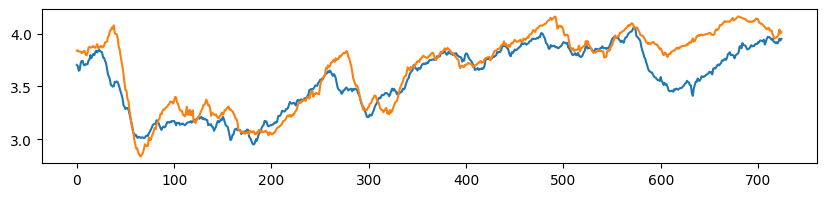

In [9]:
aaa = np.load('../data/02_aggregate_video_data/commercial_expedia_30s_100.npy')
print(aaa.shape)
m1a = np.nanmean(aaa[:10, :], axis = 0)
m2a = np.nanmean(aaa[10:, :], axis = 0)

plt.figure(figsize = (10,2));
plt.plot(m1a);
plt.plot(m2a);